NAME: JUHEE AVHAD

DATA SCIENCE INTERN AT LETSGROWMORE LGMVIPAUGUST2022

BEGINNER LEVEL TASK 2 : Stock-Market-Prediction-and-Forecasting-Using-LST 

In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

#For Ignoring the warnings 
import warnings as wgHB
wg.filterwarnings("ignore")

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:

data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
data.shape

(2035, 8)

In [8]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [9]:
data.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [34]:
data_Turnover = data['Turnover (Lacs)']

In [35]:
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

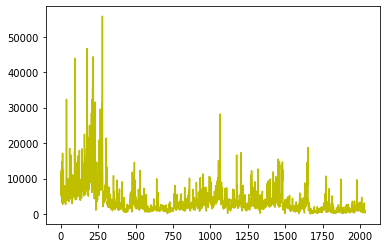

In [31]:
plt.plot(data_Turnover,'y')

In [36]:
scaler = MinMaxScaler(feature_range = (0,1))
data_Turnover = scaler.fit_transform(np.array(data_Turnover).reshape(-1,1))

In [21]:
data_Turnover.shape

(2035,)

In [37]:
data_Turnover

array([[0.12788156],
       [0.21219178],
       [0.09353452],
       ...,
       [0.00544294],
       [0.00570964],
       [0.01375712]])

In [38]:
training_size = int(len(data_Turnover) * 0.75)
test_size = len(data_Turnover) - training_size
train_data, test_data = data_Turnover[0:training_size,:], data_Turnover[training_size:len(data_Turnover),:1]

In [24]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [39]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [40]:
#Reshape the input to [samples, time steps, features] i.e requirement of LSTM

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [41]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 23s 438ms/step - loss: 0.0061 - val_loss: 0.0013
Epoch 2/100
23/23 [==============================] - 9s 400ms/step - loss: 0.0052 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 9s 400ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 9s 374ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 9s 374ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 9s 372ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 14s 639ms/step - loss: 0.0044 - val_loss: 0.0010
Epoch 8/100
23/23 [==============================] - 9s 412ms/step - loss: 0.0044 - val_loss: 0.0010
Epoch 9/100
23/23 [==============================] - 15s 663ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 10/100
23/23 [==============================] - 14s 594ms/step - loss: 0.0045 - va

In [44]:
# predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [45]:
#Transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [46]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

6102.358653112003

In [47]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

2123.770240783574

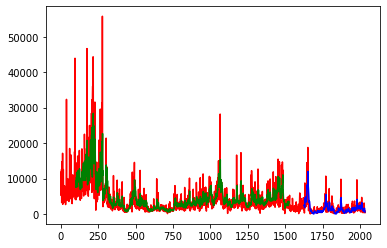

In [48]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(data_Turnover)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_Turnover)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_Turnover) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(data_Turnover),'r')
plt.plot(trainPredictPlot,'g')
plt.plot(testPredictPlot,'b')
plt.show()

In [49]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [50]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 302)

In [51]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [52]:
lst_output=[]
n_steps=301
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.03100773 0.01530079 0.0095452  0.01300943 0.02771993 0.02462398
 0.01612548 0.00864226 0.00763308 0.03609405 0.00707922 0.00772371
 0.01824867 0.01178721 0.02969559 0.01450805 0.01799435 0.02972359
 0.0180683  0.01723912 0.02447825 0.02437397 0.02650757 0.05527779
 0.02594546 0.02073206 0.0278111  0.03533488 0.04122417 0.03124464
 0.03095461 0.0330218  0.06299181 0.1031271  0.05610086 0.04028121
 0.07187008 0.19110489 0.02458432 0.00861606 0.01125255 0.02673784
 0.0353058  0.06543123 0.05301766 0.04240296 0.02225168 0.01297641
 0.00974604 0.00997774 0.02122006 0.01424817 0.0138937  0.01116568
 0.01838381 0.01564018 0.01824149 0.02899241 0.02790084 0.06987809
 0.12824069 0.04039123 0.04062975 0.02023815 0.02103322 0.02026651
 0.01544581 0.02477869 0.0101468  0.01003338 0.02091621 0.02369215
 0.00968035 0.01247352 0.02465234 0.05497789 0.01000376 0.02005562
 0.09096515 0.00784216 0.00500215 0.01972898 0.05565343 0.03197151
 0.02511574 0.01144549 0.0060668  0.02151817 0.037

0 day output [[0.00893183]]
1 day input [0.01530079 0.0095452  0.01300943 0.02771993 0.02462398 0.01612548
 0.00864226 0.00763308 0.03609405 0.00707922 0.00772371 0.01824867
 0.01178721 0.02969559 0.01450805 0.01799435 0.02972359 0.0180683
 0.01723912 0.02447825 0.02437397 0.02650757 0.05527779 0.02594546
 0.02073206 0.0278111  0.03533488 0.04122417 0.03124464 0.03095461
 0.0330218  0.06299181 0.1031271  0.05610086 0.04028121 0.07187008
 0.19110489 0.02458432 0.00861606 0.01125255 0.02673784 0.0353058
 0.06543123 0.05301766 0.04240296 0.02225168 0.01297641 0.00974604
 0.00997774 0.02122006 0.01424817 0.0138937  0.01116568 0.01838381
 0.01564018 0.01824149 0.02899241 0.02790084 0.06987809 0.12824069
 0.04039123 0.04062975 0.02023815 0.02103322 0.02026651 0.01544581
 0.02477869 0.0101468  0.01003338 0.02091621 0.02369215 0.00968035
 0.01247352 0.02465234 0.05497789 0.01000376 0.02005562 0.09096515
 0.00784216 0.00500215 0.01972898 0.05565343 0.03197151 0.02511574
 0.01144549 0.0060668  0

In [53]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [54]:
df = data_Turnover.tolist()
df.extend(lst_output)

In [55]:
len(data_Turnover)


2035